In [ ]:
The case study - Dream Housing Finance
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer's eligibility. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling online application form.

Let's start with loading the training and testing set into your python environment. You will use the training set to build your model, and the test set to validate it. Both the files are stored on the web as CSV files; their URLs are already available as character strings in the sample code.

You can load this data with the pandas.read_csv() function. It converts the data set to a python dataframe. In simple words, Python dataframe can be imagined as an equivalent of a spreadsheet or a SQL table.

train.head(n) helps to look at top n observation of train dataframe. Use it to print top 5 observations of train.
len(DataFrame) returns the total number of observations. Store the number of observations in train data in variable train_length
DataFrame.columns returns the total columns heading of the data set. Store the number of columns in test datasetin variable test_col


In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
train = pd.read_csv('train1.csv')
print(train.head())# Print top 5 observation of train dataset

train_length = len(train)# Store total number of observation in training dataset



    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
import pandas as pd
test = pd.read_csv('test1.csv')
print(test)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001015    Male     Yes          0      Graduate            No   
1    LP001022    Male     Yes          1      Graduate            No   
2    LP001031    Male     Yes          2      Graduate            No   
3    LP001035    Male     Yes          2      Graduate            No   
4    LP001051    Male      No          0  Not Graduate            No   
5    LP001054    Male     Yes          0  Not Graduate           Yes   
6    LP001055  Female      No          1  Not Graduate            No   
7    LP001056    Male     Yes          2  Not Graduate            No   
8    LP001059    Male     Yes          2      Graduate           NaN   
9    LP001067    Male      No          0  Not Graduate            No   
10   LP001078    Male      No          0  Not Graduate            No   
11   LP001082    Male     Yes          1      Graduate           NaN   
12   LP001083    Male      No         3+      Graduate          

In [11]:
test = pd.read_csv('test1.csv')
test_col = len ( test.columns)# Store total number of columns in testing data set

In [12]:
# Look at the summary of numerical variables for train data set
df= train.describe()
print (df)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [15]:
# Print the unique values and their frequency of variable Property_Area
df1 = train.Property_Area.value_counts()
print(df1)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


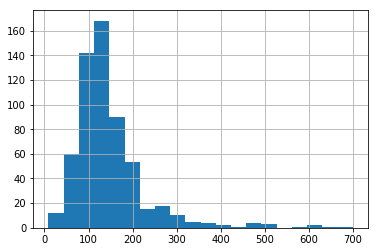

In [21]:
# Plot histogram for variable LoanAmount
train.LoanAmount.hist(bins=20)

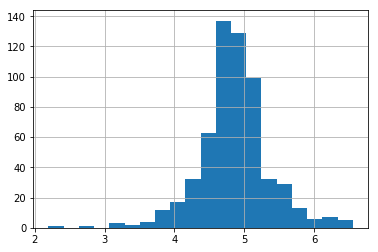

In [22]:
train ['LoanAmount_log'] = np.log(train['LoanAmount'])
train ['LoanAmount_log'].hist(bins=20)

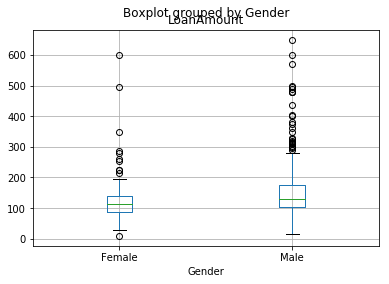

In [23]:
train.boxplot(column='LoanAmount', by = 'Gender')
# Plot a box plot for variable LoanAmount by variable Gender of training data set


In [24]:
# Approved Loan in absolute numbers
loan_approval = train['Loan_Status'].value_counts()['Y']

# Two-way comparison: Credit History and Loan Status
twowaytable = pd.crosstab(train ["Credit_History"], train ["Loan_Status"], margins=True)

In [25]:
# How many missing values in variable "Self_Employed" ?
n_missing_value_Self_Employed = train['Self_Employed'].isnull().sum()
print(n_missing_value_Self_Employed)

# Variable Loan amount has missing values or not?
LoanAmount_have_missing_value = train['LoanAmount'].isnull().sum() > 0
print(LoanAmount_have_missing_value)


32
True


In [26]:
# Check variables have missing values in test data set
number_missing_values_test_data = test.isnull().sum()
print(number_missing_values_test_data)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [27]:
# Impute missing value of LoanAmount with 168 for test data set
test['LoanAmount'].fillna(168, inplace=True)

In [28]:
# Inpute missing value of Gender (Male is more frequent category)
train['Gender'].fillna('Male',inplace=True)


# Inpute missing value of Credit_History ( 1 is more frequent category)
train['Credit_History'].fillna(1,inplace=True)

In [29]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# Perform log transformation of TotalIncome to make it closer to normal
train['TotalIncome_log']= np.log(train['TotalIncome'])

In [30]:
#import module for label encoding
from sklearn.preprocessing import LabelEncoder

#train and test dataset is already loaded in the enviornment
# Perform label encoding for variable 'Married'
number = LabelEncoder()
train['Married_new'] = number.fit_transform(train['Married'].astype(str))

In [2]:
# Import linear model of sklearn

import sklearn.linear_model
# Create object of Logistic Regression
model=sklearn.linear_model.LogisticRegression()

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv("train1.csv")
test = pd.read_csv("test1.csv")

#Combining both train and test dataset

train['Type']='Train' #Create a flag for Train and Test Data set
test['Type']='Test'
fullData = pd.concat([train,test],axis=0)

#Identify categorical and continuous variables

ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']
print(cat_cols)

other_col=['Type'] #Test and Train Data set identifier
num_cols= list(set(list(fullData.columns))-set(cat_cols)-set(ID_col)-set(target_col)-set(other_col))

#Inputing Missing values with mean for continuous variable
fullData[num_cols] = fullData[num_cols].fillna(fullData[num_cols].mean(),inplace=True)


#Inputing Missing values with mode for categorical variables
cat_input=pd.Series(fullData[cat_cols].mode().values[0])
cat_input.index=cat_cols
fullData[cat_cols] = fullData[cat_cols].fillna(cat_input,inplace=True)

#Create a new column as Total Income
fullData['TotalIncome']=fullData['ApplicantIncome']+fullData['CoapplicantIncome']

#Take a log of TotalIncome + 1, adding 1 to deal with zeros of TotalIncome it it exists
fullData['Log_TotalIncome']=np.log(np.float32(fullData['TotalIncome']))



['Credit_History', 'Dependents', 'Gender', 'Married', 'Education', 'Property_Area', 'Self_Employed']


D:\Anaconda\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
#create label encoders for categorical features
for v in cat_cols:
    number = LabelEncoder()
    fullData[v] = number.fit_transform(fullData[v].astype('str'))

train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
#train_modified and test_modified already loaded in the workspace
#Import module for Logistic regression
import sklearn.linear_model
train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))
# Select three predictors Credit_History, Education and Gender
predictors =['Credit_History','Education','Gender']

# Converting predictors and outcome to numpy array
x_train = train_modified[predictors].values
y_train = train_modified['Loan_Status'].values

# Model Building
model = sklearn.linear_model.LogisticRegression()
model.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
import sys
print(sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


In [19]:
# Select three predictors Credit_History, Education and Gender
predictors =['Credit_History','Education','Gender']

# Converting predictors and outcome to numpy array
x_test = test_modified[predictors].values

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted

#Output file to make submission
test_modified.to_csv("Submission1.csv",columns=['Loan_ID','Loan_Status'])

D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
# Import tree module of sklearn
import sklearn.tree

# Create object of DecisionTreeClassifier
model = sklearn.tree.DecisionTreeClassifier()

In [27]:
model.fit(x_train,y_train)

x_test = test_modified[predictors].values

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted

#Output file to make submission
test_modified.to_csv("Submission_DT.csv",columns=['Loan_ID','Loan_Status'])



D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [42]:
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x_train,y_train)
    distortions.append(kmeanModel.inertia_)
    


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

ValueError: x and y must have same first dimension, but have shapes (7,) and (0,)

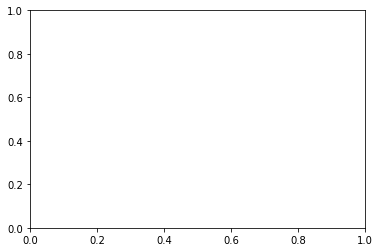

In [43]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [36]:
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

ros = RandomOverSampler()
X_sample, y_sample = ros.fit_sample(train, y_train)
model = sklearn.ensemble.RandomForestClassifier()

#fitting a model
model.fit(x_train,y_train)

# Converting predictors and outcome to numpy array
x_test = test_modified[predictors].values

#Predict Output
predicted= model.predict(x_test)


#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted

#Output file to make submission
test_modified.to_csv("Submission_RF.csv",columns=['Loan_ID','Loan_Status'])
print(recall_score(y_test, y_pred), precision_score(y_test, y_pred), accuracy_score(y_test, y_pred))


NameError: name 'X_train' is not defined

In [29]:
featimp = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)

print (featimp)


Gender            0.0
Education         0.0
Credit_History    0.0
dtype: float64


In [33]:
#predictors=['ApplicantIncome', 'CoapplicantIncome', 'Credit_History','Dependents', 'Education', 'Gender', 'LoanAmount',
            #'Loan_Amount_Term', 'Married', 'Property_Area', 'Self_Employed', 'TotalIncome','Log_TotalIncome']

# Converting predictors and outcome to numpy array
#x_train = train_modified[predictors].values
#y_train = train_modified['Loan_Status'].values
#x_test = test_modified[predictors].values

# Model Building
#model = sklearn.ensemble.RandomForestClassifier()
#model.fit(x_train, y_train)


In [38]:
freq_df = freq_df.drop(columns=useless_features)

NameError: name 'freq_df' is not defined

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def k_mean(df):
    distortions = []
    K = range(1,8)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(df)
        distortions.append(kmeanModel.inertia_)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

label = k_mean()

TypeError: k_mean() missing 1 required positional argument: 'df'